### Linear Regression 

Dataset: seaborn.tips

Model: Simple Linear Regression

### DATA COLLECTION

In [1]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset("tips")
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [2]:
#Understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
#stats sum
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


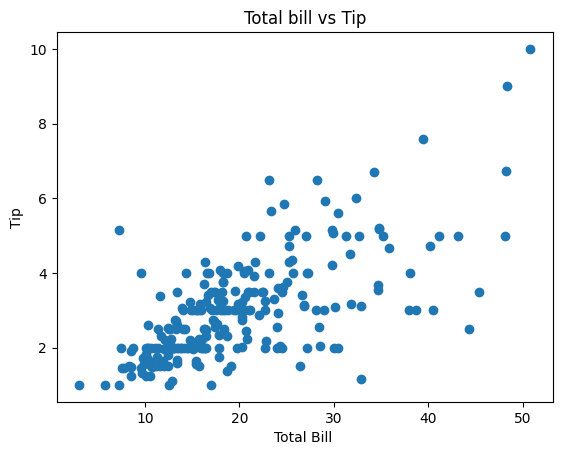

In [5]:
#Relationship check
#Before using any model we have to confirm relationship..?
import matplotlib.pyplot as plt
plt.scatter(df["total_bill"],df["tip"])
plt.xlabel("Total Bill ")
plt.ylabel("Tip")
plt.title('Total bill vs Tip')
plt.show()


### Observations:
1.As the bill increases tip increases

2.Relationship- Straight line(we can use linear regression)

3.Feature & Target Separation

(Input variable always 2D)

In [6]:
#4.Feature and target Separation
x=df[["total_bill"]]
y=df["tip"]


In [8]:
#5 Train-Test split
#A model must perform well on unseen data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


80% ---> Training

20% ---> Testing

### 6 Feature Standardization
Compare coefficients fairly

Avoid Dominance of large values

prepare for ridge & lasso

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)
#1.Fit only on training
#2.Prevents the data leakage

### 7. Train Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_std,y_train)
print("Co-efficient ",lr.coef_)
print("Intercept ",lr.intercept_)

Co-efficient  [0.93571714]
Intercept  3.0877948717948724


### 8. Model Evaluation

In [11]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred=lr.predict(x_test_std))
print("R2 Score ",r2)

R2 Score  0.5449381659234664


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
mse=mean_squared_error(y_test,y_pred=lr.predict(x_test_std))
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)

MSE  0.5688142529229538
RMSE  0.7541977545199626


### 9.Visualize the best fit line

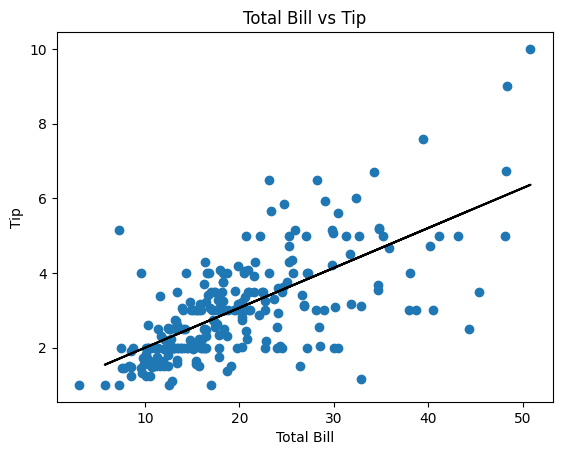

In [13]:
plt.scatter(x,y)
plt.plot(x_train,lr.predict(x_train_std),color="black")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()

### 10. Input Output Real time

In [14]:
import pandas as pd
bill_amount = float(input("Enter the bill amount: "))
bill_df = pd.DataFrame([[bill_amount]], columns=["total_bill"])
bill_scaled = sc.transform(bill_df)
tip_amount = lr.predict(bill_scaled)
print(f"Tip Amount: {tip_amount[0]:.2f}")


Tip Amount: 535.74
